In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PATH = '/home/tbrownex/Hackett/JLP/'
FILE = 'normal.csv'  # means "normal" parking, i.e. not the disrupted parking

In [35]:
def printSales(data, x):
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    majorLocator = MultipleLocator(5)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(1)

    fig, ax = plt.subplots()
    plt.plot(data)
    plt.title(x)
    plt.axvline(x=8,color='r', linewidth=.75)
    ax.set_ylim([0,data.max()])

    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)

# for the minor ticks, use no labels; default NullFormatter
    ax.xaxis.set_minor_locator(minorLocator)

    plt.show()

In [25]:
df = pd.read_csv(PATH+FILE)

In [32]:
sales = df.loc[df["Layout Group"]==1]["Full Price Sales"]
sales = sales.reset_index(drop=True)

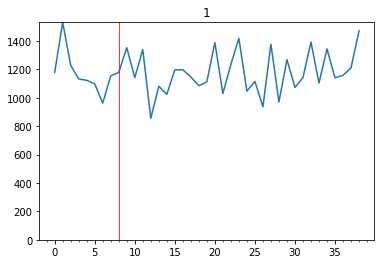

In [36]:
printSales(sales,1)

In [41]:
def ghFilter(sales, init, rate, g, h, dt):
    '''
    x0= initial guess
    rate = weight gain/day
    g = measurement vs prediction factor
    h = old gain/day vs current gain/day factor
    dt = time step (1/day)'''
    estimates   = []
    predictions = []
    prevWeight = init
    for w in sales:
        pred     = prevWeight + rate*dt
        residual = w - pred
        est      = pred + g*residual
        estimates.append(est)          # Save the estimate
        predictions.append(pred)       # Save the prediction
        rate = rate + h*(residual)/dt        # Update the model gain/day
        prevWeight = est
    return predictions, estimates

In [62]:
x0   = 1200.          # Initial guess
rate = 1.          # "dx"...the multiplier in the model
g    = .6
h    = .3
dt   = 1.            # time interval (1 day)

predictions, estimates = ghFilter(sales, x0, rate, g, h, dt)

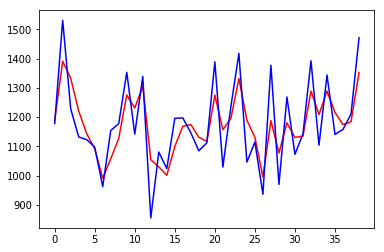

In [63]:
plt.plot(estimates, color="r")
plt.plot(sales, color="b")
#plt.plot(predictions, color="y")
plt.show()

In [117]:
# This is a linear generator
def genData(init, rate, noiseFactor, size):
    return [init + rate*n + np.random.randn()*noiseFactor for n in range(size)]

In [186]:
# This is an accelerator generator: rate is increasing
def genData2(init, rate, noiseFactor, size, accel):
    points = []
    for n in range(size):
        p = init + rate*n + np.random.randn()*noiseFactor
        points.append(p)
        rate += accel
    return points

In [191]:
points = genData2(init=5, rate=2, noiseFactor=0, size=20, accel=.3)

plt.plot(points, 'bo')
plt.show()

In [192]:
x0=5
rate=1
g=.2
h=.02
predictions, estimates, endGain = ghFilter(points, x0, rate, g, h, dt)

plt.plot(estimates, color="r")
plt.plot(points,  'bo')
plt.plot(predictions, color="y")
plt.show()

In [197]:
# This shows that larger "g" means estimate will be closer to the measurement
# Smaller "g" favors the prediction
# Measurements include noise where the prediction - based on a model - ignores
# noise. So larger "g" includes more noise
x0=5
rate=1
g1=.2
h=.02
_, estimates1 = ghFilter(points, x0, rate, g1, h, dt)
g2=.7
_, estimates2 = ghFilter(points, x0, rate, g2, h, dt)

plt.plot(estimates1, color="r")
plt.plot(points,  'bo')
plt.plot(estimates2, color="y")
plt.show()

##### Varying H

In [220]:
weights = np.linspace(0, 1, 50)

_, estimates1 = ghFilter(weights, init=0, rate=0., dt=1., g=.2, h=0.05)
_, estimates2 = ghFilter(weights, init=0, rate=2., dt=1., g=.2, h=0.05)
_, estimates3 = ghFilter(weights, init=0, rate=2., dt=1., g=.2, h=0.5)

In [221]:
plt.plot(estimates1, color="y")
plt.plot(estimates2, color="r")
plt.plot(estimates3, color="b")
plt.show()

In [198]:
data2 = g_h_filter(data=zs, x0=0, dx=2., dt=1., g=.2, h=0.05)
data3 = g_h_filter(data=zs, x0=0, dx=2., dt=1., g=.2, h=0.5)

##### Varying g and h

In [232]:
weights = genData(init=5, rate=5., noiseFactor=50, size=100)

In [224]:
plt.plot(weights)
plt.show()

In [260]:
# Minimal g and h
_, estimates = ghFilter(weights, init=5, rate=28., dt=1., g=0.2, h=.0)

In [261]:
plt.plot(estimates, color="r")
plt.plot(weights, color='b')
plt.show()

In [1]:
from filterpy.gh import GHFilter

In [2]:
f = GHFilter(x=0., dx=0., dt=1., g=.8, h=.2)

In [4]:
f.__dict__

{'dt': 1.0,
 'dx': 0.0,
 'dx_prediction': 0.0,
 'g': 0.8,
 'h': 0.2,
 'x': 0.0,
 'x_prediction': 0.0,
 'y': 0.0,
 'z': 0.0}